In [1]:
from pylab import *
from scipy.special import *
from scipy.optimize import *

Funciones elípticas de Jacobi son ${\rm sn}(x|m)$, ${\rm cn}(x|m)$ y ${\rm dn}(x|m)$ con parámetro elíptico $m$. Éstas tienen una periodicidad $2K(m)$ relacionada con la integral elíptica de Jacobi de segundo orden: $$K(m)=\int _0 ^{\pi/2} \frac{d\xi}{\sqrt{1-m \sin^2 \xi}}$$

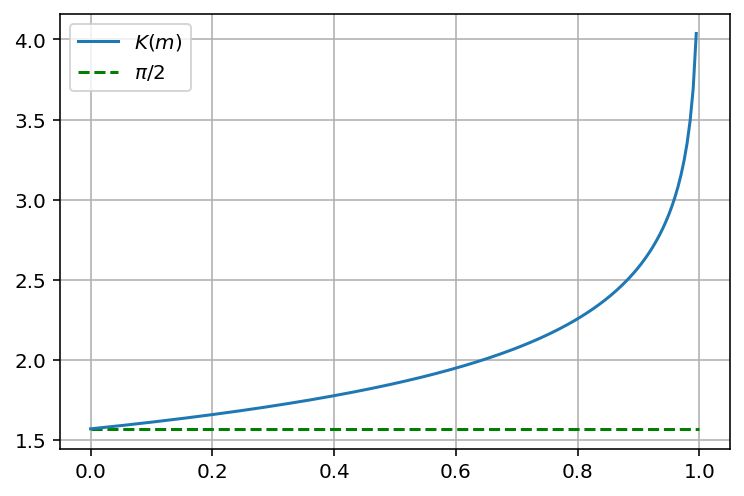

In [2]:
m = linspace(0,1,200)
K = ellipk(m)
plot(m,K,label="$K(m)$")
hlines(0.5*pi,0,1,color="green",linestyles="dashed",label="$\pi/2$")
grid(),legend()
show()

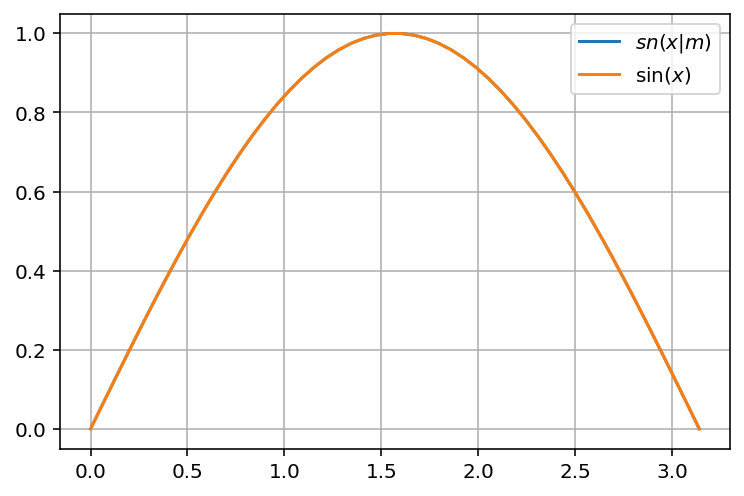

In [3]:
m = 0
x = linspace(0,pi)
y = ellipj(x,m)
plot(x,y[0],label="$sn (x|m)$")
plot(x,sin(x),label="$\sin (x)$")
grid(),legend()
show()

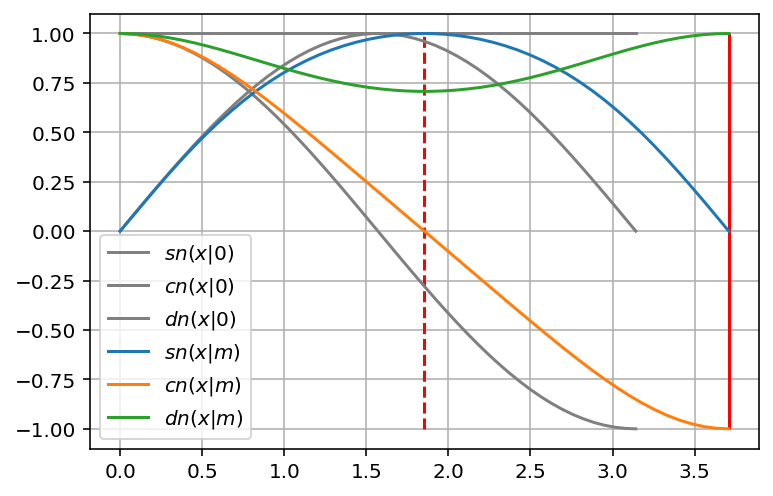

In [4]:
m = 0
x = linspace(0,pi)
y = ellipj(x,m)
plot(x,y[0],label="$sn (x|0)$",color="gray")
plot(x,y[1],label="$cn (x|0)$",color="gray")
plot(x,y[2],label="$dn (x|0)$",color="gray")
m=0.5
x = linspace(0,2*ellipk(m))
y = ellipj(x,m)
plot(x,y[0],label="$sn (x|m)$")
plot(x,y[1],label="$cn (x|m)$")
plot(x,y[2],label="$dn (x|m)$")
vlines(ellipk(m),-1,1,color="red",linestyles="dashed")
vlines(2*ellipk(m),-1,1,color="red")
grid(),legend()
show()

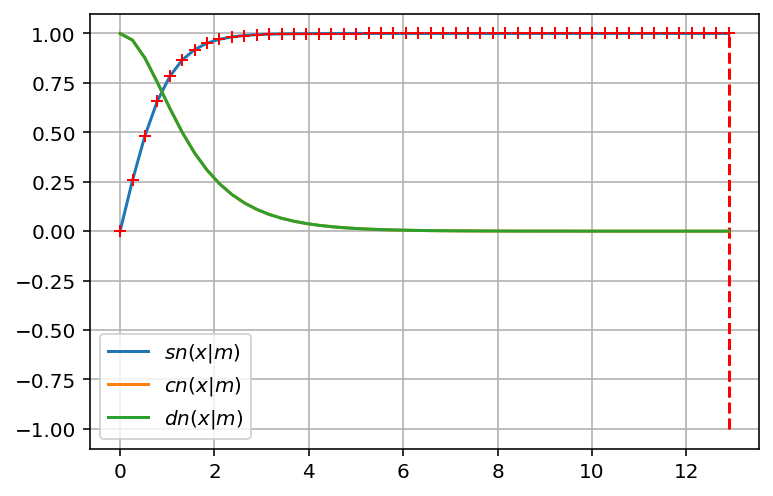

In [5]:
m=0.9999999999
x = linspace(0,ellipk(m))
y = ellipj(x,m)
plot(x,y[0],label="$sn (x|m)$")
plot(x,y[1],label="$cn (x|m)$")
plot(x,y[2],label="$dn (x|m)$")
vlines(ellipk(m),-1,1,color="red",linestyles="dashed")
plot(x,tanh(x),"r+")
grid(),legend()
show()

Buscamos las raices de la relación:
$$
{\rm sn }\left( \sqrt{\frac{2}{1+m}}\xi \right) = \sqrt{m}
$$
con $\xi = \sqrt{V_0}R$

In [6]:
def CoPeg_R(xi,m):
    s,c,d,ph = ellipj(sqrt(2/(1+m))*xi,m)
    f = s-sqrt(m)
    return f

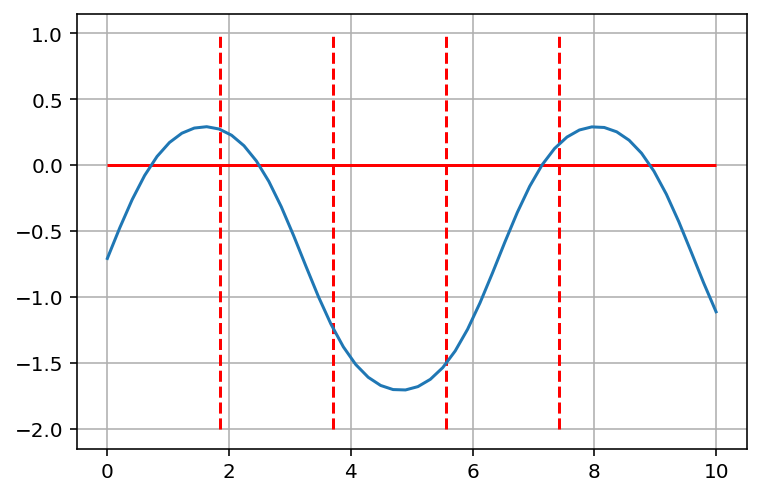

In [7]:
m=0.5
xi = linspace(0,10)
plot(xi,CoPeg_R(xi,m))
hlines(0,0,10,color="red")
vlines(ellipk(m),-2,1,color="red",linestyles="dashed")
vlines(2*ellipk(m),-2,1,color="red",linestyles="dashed")
vlines(3*ellipk(m),-2,1,color="red",linestyles="dashed")
vlines(4*ellipk(m),-2,1,color="red",linestyles="dashed")
grid()
show()

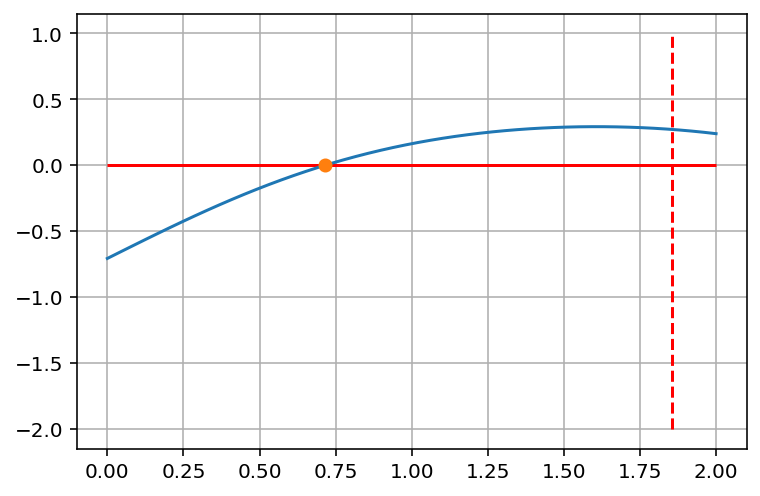

In [8]:
xi_0 = fsolve(lambda xi: CoPeg_R(xi,m),0.0)
m=0.5
xi = linspace(0,2)
plot(xi,CoPeg_R(xi,m))
hlines(0,0,2,color="red")
vlines(ellipk(m),-2,1,color="red",linestyles="dashed")
plot(xi_0,[0.0],'o')
grid()
show()

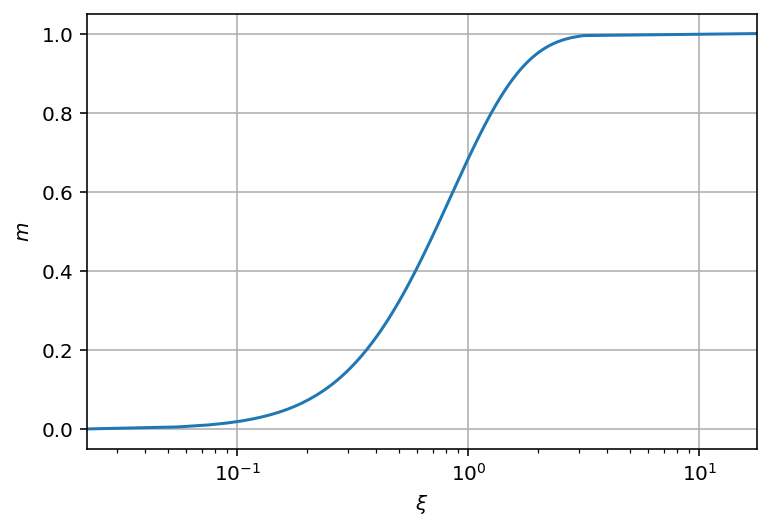

In [11]:
ms = linspace(0.001,1-1e-15,200)
xi_0s = np.zeros(len(ms))
xi_0s[0] = fsolve(CoPeg_R,0.1,args=(ms[0],))
for i in range(len(ms)-1):
    xi_0s[i+1] = fsolve(CoPeg_R,xi_0s[i],args=(ms[i+1],))
semilogx(xi_0s,ms)
xlabel(r'$\xi$'),ylabel(r'$m$'),xlim([min(xi_0s),max(xi_0s)])
grid()
show()